# Loading the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

In [3]:
data = pd.read_csv('MedCosts.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Visualize the Data

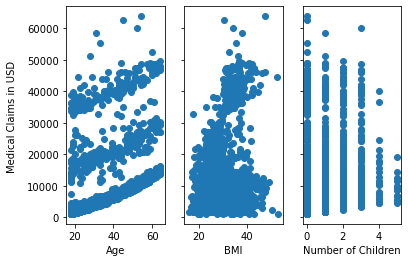

In [5]:
# Examine the relationship between charges and numeric variables
charges = data['charges']
numeric_vars = ['age', 'bmi', 'children']
numeric_labels = ['Age', 'BMI', 'Number of Children']
num_vars = len(numeric_vars)

fig, axs = plt.subplots(1, num_vars, sharey=True)
for i in range(num_vars):
    axs[i].scatter(data[numeric_vars[i]], charges)
    axs[i].set_xlabel(numeric_labels[i])
fig.text(0, 0.5, 'Medical Claims in USD', ha='center', va='center', rotation='vertical')
plt.show()
    

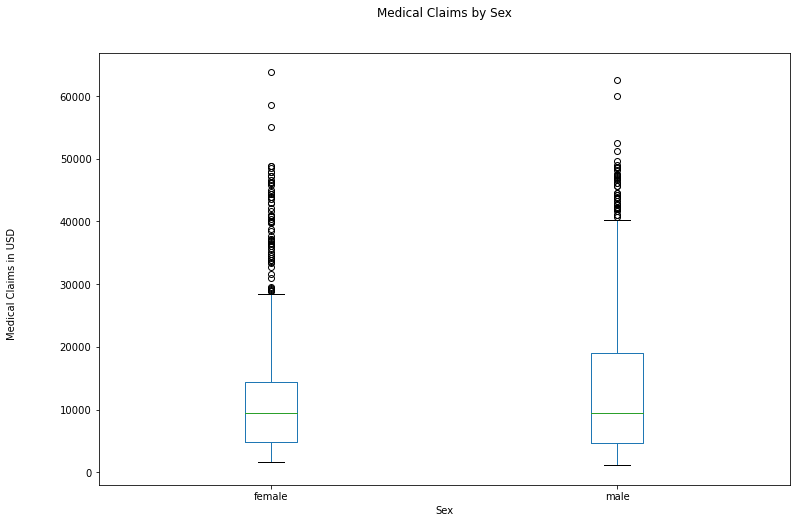

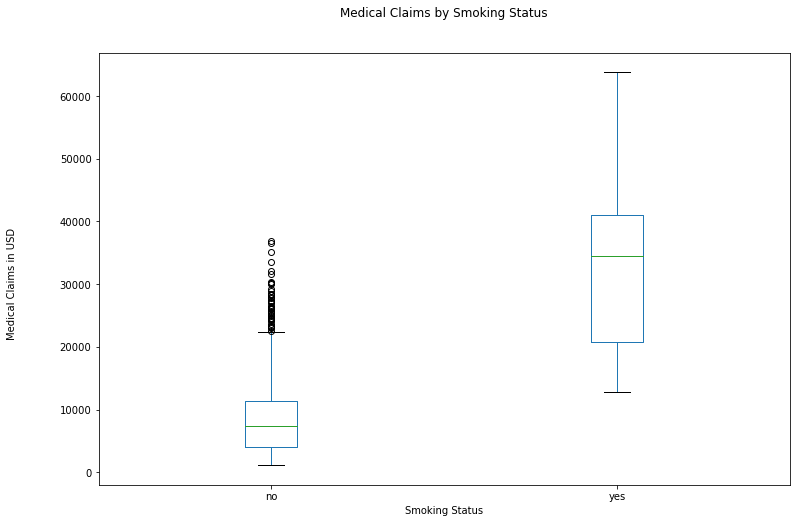

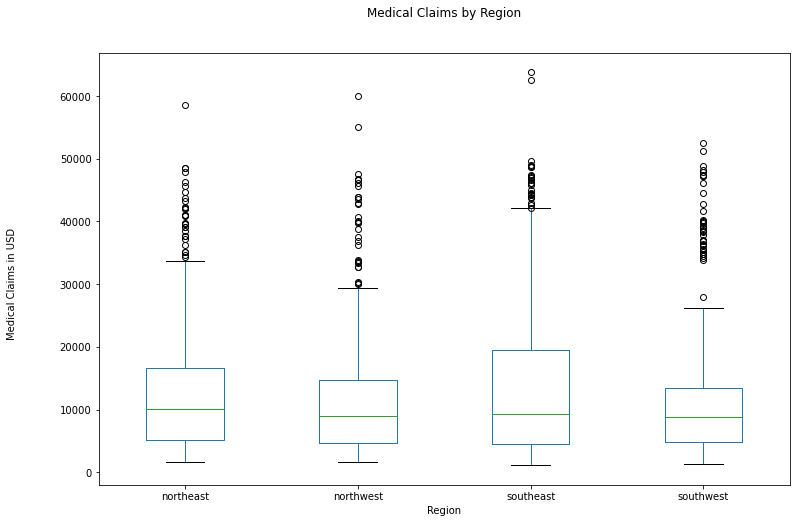

In [6]:
# Examine the relationship between charges and categorical variables
categorical_vars = ['sex' , 'smoker', 'region']
categorical_labels = ['Sex', 'Smoking Status', 'Region']
num_cat_vars = len(categorical_vars)

for i in range(num_cat_vars):
    fig, ax = plt.subplots(figsize=(12,8))
    data.boxplot(column = 'charges', by = categorical_vars[i], ax=ax, grid = False)
    fig.text(0, 0.5, 'Medical Claims in USD', ha='center', va='center', rotation='vertical')
    ax.set_xlabel(categorical_labels[i])
    ax.set_title('')
    fig.suptitle('Medical Claims by ' + categorical_labels[i])
plt.show()

# Pre-Process the Data

In [7]:
# Encode Categorical Variables
for var in categorical_vars:
    one_hot = pd.get_dummies(data[var])
    data = data.drop(var,axis = 1)
    data = data.join(one_hot)

In [8]:
data.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [9]:
# Create train and test split 
cols = data.columns.drop('charges')
X_train, X_test, y_train, y_test = train_test_split(data[cols], data['charges'], test_size=0.2)

In [10]:
# Examine data structure
X_train.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
792,22,23.180,0,1,0,1,0,1,0,0,0
308,58,34.865,0,0,1,1,0,1,0,0,0
359,18,20.790,0,1,0,1,0,0,0,1,0
846,51,34.200,1,1,0,1,0,0,0,0,1
779,53,28.880,0,0,1,1,0,0,1,0,0


In [18]:
# Fit a simple linear regression model to the data
regr = LinearRegression()
regr.fit(X_train, y_train)

# Print R-squared value
print(regr.score(X_test, y_test))

# Print the coefficients
print(regr.coef_)

# Pickle and save the model 
filename = 'MedCostModel.pkl'
pickle.dump(regr, open(filename, 'wb'))

0.7936871608878275
[   255.25097272    332.57432986    535.04107943    166.46214017
   -166.46214017 -11881.00864085  11881.00864085    528.52453062
    203.79245169   -508.95681244   -223.36016987]


In [35]:
# Load model
model = pickle.load(open('MedCostModel.pkl', 'rb'))
# Get sample JSON data
input = {'age': 23,'bmi': 25, 'children': 2, 'female':0, 'male':1, 'no':1, 'yes':0, 'northeast':1, 'northwest':0, 'southeast':0, 'southwest':0}

In [36]:
sample = pd.DataFrame(input, index =[0])
sample.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
0,23,25,2,0,1,1,0,1,0,0,0


In [39]:
# Make prediction
prediction = model.predict(sample)
print(prediction)

[3284.85773177]
